# Research

In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
import time
import matplotlib.pyplot as plt

In [2]:
df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).ffill().dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)
df_trading_signal = pd.read_csv("ft_trading_signals.csv", index_col=0)
df_trading_signal.index.name = 'Code'

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

df_perform = df_perform[df_perform['currency'].isin(['EUR','USD'])]

df_perform = df_perform[~df_perform.index.str.startswith("PT")]

### Short term

In [3]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0496369116,0.1191,-0.0261,0.0705,0.2850,0.3202,0.0621,Sector Equity Precious Metals,Franklin Gold & Precious Metals Fund N(acc)USD,USD,3,7,0.025084,0.049658,0.106498
IE00B3M56506,0.0170,-0.0178,0.1750,0.1589,0.1007,0.0818,Global Emerging Markets Equity,Neuberger Berman Emerging Markets Equity Fund ...,USD,2,6,-0.003509,0.047005,0.048938
LU0117841949,0.0275,-0.1174,-0.0246,0.0549,0.1321,0.1258,Greater China Equity,JPMorgan Funds - Greater China Fund D (acc) - USD,USD,3,6,0.010050,0.044931,0.051373
FR0000989923,-0.0326,-0.0488,0.2567,0.1660,0.1522,0.1540,Property - Indirect Eurozone,Oddo BHF Immobilier DR-EUR,EUR,3,6,0.000000,0.044263,0.050661
FR0000989915,-0.0326,-0.0488,0.2566,0.1660,0.1522,0.1540,Property - Indirect Eurozone,Oddo BHF Immobilier CR-EUR,EUR,4,6,0.000000,0.044257,0.050652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU0568614167,0.0598,0.0879,0.0554,0.0534,-0.0619,-0.0378,Africa & Middle East Equity,Amundi Funds - Equity MENA G USD (C),USD,3,5,0.000000,-0.018543,-0.013390
LU0329206832,0.0797,0.0800,0.1436,0.1308,0.0212,-0.0243,Japan Flex-Cap Equity,JPMorgan Investment Funds - Japan Strategic Va...,EUR,2,6,0.003444,-0.020605,-0.033528
LU0568614241,0.0360,0.0309,0.0414,0.0457,-0.0591,-0.0182,Other Equity,Amundi Funds - Equity MENA G EUR Hgd (C),EUR,0,5,0.000000,-0.020830,-0.014690
LU1670715975,0.1166,0.0852,0.0619,0.0876,0.0299,-0.0022,Japan Small/Mid-Cap Equity,M&G (Lux) Japan Smaller Companies Fund A EUR Acc,EUR,4,6,-0.001057,-0.021329,-0.022746


In [4]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0496369116,0.1191,-0.0261,0.0705,0.2850,0.3202,0.0621,Sector Equity Precious Metals,Franklin Gold & Precious Metals Fund N(acc)USD,USD,3,7,0.025084,0.049658,0.106498
LU0117841949,0.0275,-0.1174,-0.0246,0.0549,0.1321,0.1258,Greater China Equity,JPMorgan Funds - Greater China Fund D (acc) - USD,USD,3,6,0.010050,0.044931,0.051373
FR0000989923,-0.0326,-0.0488,0.2567,0.1660,0.1522,0.1540,Property - Indirect Eurozone,Oddo BHF Immobilier DR-EUR,EUR,3,6,0.000000,0.044263,0.050661
FR0000989915,-0.0326,-0.0488,0.2566,0.1660,0.1522,0.1540,Property - Indirect Eurozone,Oddo BHF Immobilier CR-EUR,EUR,4,6,0.000000,0.044257,0.050652
LU0069152568,0.0498,0.0165,0.0279,0.1559,0.0280,0.0862,Sector Equity Biotechnology,UBS (Lux) Equity Fund - Biotech (USD) P-acc,USD,3,7,0.000000,0.043092,0.036567
LU0117867159,-0.0097,-0.1756,-0.1089,0.0227,0.1545,0.1485,China Equity,JPMorgan Funds - China Fund D (acc) - USD,USD,3,7,0.017466,0.041478,0.042970
LU0173614495,0.0096,0.0181,0.0102,0.1181,0.1977,0.1456,China Equity,Fidelity Funds - China Focus Fund A-DIST-USD,USD,4,6,0.010475,0.040813,0.069237
LU0197773160,0.0532,0.0263,0.1457,0.1486,0.1065,0.1095,Asia-Pacific ex-Japan Equity Income,HSBC Global Investment Funds - Asia Pacific ex...,USD,3,6,0.003936,0.040477,0.064185
LU0496369389,0.1189,-0.0254,0.0714,0.2839,0.3212,0.0621,Sector Equity Precious Metals,Franklin Gold & Precious Metals Fund N(acc)EUR,EUR,3,7,0.023161,0.040166,0.094752
LU1882445643,-0.0421,-0.1486,-0.0680,0.0209,0.1943,0.1599,China Equity,Amundi Funds - China Equity A USD (C),USD,3,6,0.015695,0.039786,0.108483


In [5]:
df_perform[(df_perform['risk']<=3) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
IE00B90VC092,-0.0003,0.0064,0.0541,0.0332,0.0352,0.0275,EUR Diversified Bond - Short Term,PIMCO European Short-Term Opportunities Fund E...,EUR,2,3,-0.002953,0.016048,0.018090
LU0459992896,-0.0143,-0.0383,0.0101,0.0287,0.0025,0.0244,Global Flexible Bond - EUR Hedged,Jupiter Dynamic Bond Class L EUR Q Inc,EUR,3,3,-0.001250,0.007566,0.017834
LU0853555380,-0.0144,-0.0384,0.0102,0.0277,0.0016,0.0236,Global Flexible Bond - EUR Hedged,Jupiter Dynamic Bond Class L EUR Acc,EUR,2,3,-0.001784,0.008108,0.017273
LU0459959929,0.0033,-0.0156,0.0311,0.0332,0.0274,0.0309,"Convertible Bond - Global, EUR Hedged",Candriam Bonds Convertible Defensive Class C E...,EUR,3,3,0.000000,0.006568,0.016192
LU0413543991,-0.0299,-0.0268,0.0464,0.0434,0.0324,0.0213,EUR Cautious Allocation - Global,Fidelity Funds - Global Multi Asset Defensive ...,EUR,2,3,0.000930,0.005607,0.013183
IE00B5B2BY02,-0.0258,-0.0584,-0.0763,-0.0495,-0.0032,0.0445,Macro Trading EUR,GAM Star Fund plc - GAM Star Emerging Market R...,EUR,2,3,0.000000,0.006536,0.013158
LU0546913194,0.0104,0.0195,0.0679,0.0569,0.0372,0.0211,Capital Protected,NN (L) First Class Protection - P Cap EUR,EUR,0,3,-0.000601,-0.000300,0.013094
LU1116037828,0.0102,-0.0067,0.0764,0.0573,0.0268,0.0205,EUR Cautious Allocation - Global,Pictet-Multi Asset Global Opportunities R dm EUR,EUR,3,3,0.000000,0.005495,0.012916
LU1089088071,0.0107,-0.0021,0.0736,0.0403,0.0214,0.0218,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,-0.002055,0.002784,0.012880
LU0941349275,0.0102,-0.0067,0.0764,0.0572,0.0268,0.0205,EUR Cautious Allocation - Global,Pictet-Multi Asset Global Opportunities R EUR,EUR,3,3,0.000000,0.005509,0.012839


### Category 

In [6]:
#df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].mean().rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].median().rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].median().rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].max().rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].count().rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].median().rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].max().rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].median().rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].max().rename('2 w max'))

In [7]:
df_cat_perform['1 w mean'].sort_values(ascending=False)[:20]

ft category
Property - Indirect Eurozone           0.044260
Hong Kong Equity                       0.036542
Greater China Equity                   0.034650
Germany Small/Mid-Cap Equity           0.028745
China Equity                           0.028480
Indonesia Equity                       0.027870
India Equity                           0.027434
ASEAN Equity                           0.026659
Asia ex-Japan Equity                   0.026037
Property - Indirect North America      0.025917
Property - Indirect Europe             0.025083
Asia-Pacific Equity                    0.021465
Taiwan Large-Cap Equity                0.020872
Thailand Equity                        0.020589
Global Emerging Markets Equity         0.020115
Pacific ex-Japan Equity                0.019650
Asia-Pacific ex-Japan Equity Income    0.019608
Property - Indirect Other              0.019496
Spain Equity                           0.019369
Asia-Pacific ex-Japan Equity           0.019219
Name: 1 w mean, dtype: float

In [8]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Property - Indirect Eurozone,-0.0706,-0.0844,-0.0234,0.0133,0.0891,0.0890,0.000000,0.15400,0.000000,0.1540,2.0,0.044260,0.044263,0.050656,0.050661
Hong Kong Equity,-0.0182,-0.0574,-0.0296,0.0596,0.1648,0.1610,0.014487,0.15140,0.014487,0.1636,2.0,0.036542,0.037711,0.062512,0.064536
Greater China Equity,0.0102,-0.0826,0.0390,0.0815,0.1330,0.1167,0.008326,0.12580,0.009163,0.1700,9.0,0.034650,0.044931,0.049514,0.095010
Germany Small/Mid-Cap Equity,0.0292,-0.0527,-0.0031,0.0568,0.0509,0.0522,0.000000,0.06030,0.000000,0.0603,1.0,0.028745,0.028745,0.048846,0.048846
China Equity,-0.0240,-0.1198,-0.0517,0.0392,0.1630,0.1250,0.008858,0.13805,0.008887,0.1951,32.0,0.028480,0.041478,0.058434,0.108483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Options Trading,-0.0858,-0.0938,-0.1175,-0.0335,-0.0633,0.0054,0.000159,-0.04165,0.000000,0.0111,4.0,-0.004361,0.006394,-0.018945,0.013522
JPY Bond,-0.0923,-0.1151,-0.1921,-0.0667,-0.0633,-0.0327,0.000000,-0.02860,0.000000,-0.0286,1.0,-0.007945,-0.007945,-0.027644,-0.027644
Japan Small/Mid-Cap Equity,0.0226,-0.0191,-0.0151,0.0454,-0.0140,-0.0165,-0.001226,-0.00780,-0.000987,-0.0022,4.0,-0.009127,-0.001377,-0.006791,0.012486


In [9]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="2 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Sector Equity Precious Metals,0.1113,0.0043,0.0362,0.2403,0.3167,0.0561,0.013489,0.06210,0.021743,0.0740,10.0,0.016951,0.049658,0.078473,0.106498
Hong Kong Equity,-0.0182,-0.0574,-0.0296,0.0596,0.1648,0.1610,0.014487,0.15140,0.014487,0.1636,2.0,0.036542,0.037711,0.062512,0.064536
China Equity,-0.0240,-0.1198,-0.0517,0.0392,0.1630,0.1250,0.008858,0.13805,0.008887,0.1951,32.0,0.028480,0.041478,0.058434,0.108483
Nordic Small/Mid-Cap Equity,0.0980,-0.0357,0.0991,0.2288,0.0901,0.0877,-0.003286,0.09580,-0.003286,0.0958,1.0,0.018074,0.018074,0.051467,0.051467
Spain Equity,0.0719,0.0907,0.3090,0.2418,0.1217,0.1063,0.000864,0.09045,0.000000,0.1056,4.0,0.019369,0.026781,0.051145,0.064803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa & Middle East Equity,0.0513,0.0779,0.0485,0.0252,-0.0202,-0.0228,0.000000,-0.04135,0.000000,-0.0378,2.0,-0.015192,-0.011841,-0.013147,-0.012903
Sector Equity Biotechnology,0.0638,-0.0208,0.0109,0.1714,-0.0237,0.0304,-0.001219,0.03595,0.000000,0.0862,8.0,0.005399,0.043092,-0.016053,0.036567
Options Trading,-0.0858,-0.0938,-0.1175,-0.0335,-0.0633,0.0054,0.000159,-0.04165,0.000000,0.0111,4.0,-0.004361,0.006394,-0.018945,0.013522


In [10]:
trendy_cat = df_cat_perform.apply(lambda x: x['1 w mean'] + x['1 m mean']*(1 if (x['1 w mean']<0 and x['1 m mean']<0) else -1)  ,axis=1).sort_values(ascending=False)[:10]
trendy_cat = df_cat_perform[df_cat_perform.apply(lambda x: (x['1 w mean'] > 0) and (x['1 m mean'] <0)  ,axis=1)][:20].sort_values(by=['2 w mean'],ascending=False)
trendy_cat

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Commodities - Broad Basket,0.0558,0.0501,0.0589,0.0409,0.1042,-0.0002,0.004741,-0.00290,0.000000,0.0138,6.0,0.011402,0.029730,0.026876,0.042408
Indonesia Equity,-0.0316,0.0170,-0.1033,-0.0526,-0.0889,-0.0267,0.005289,-0.01900,0.005289,-0.0190,1.0,0.027870,0.027870,0.022765,0.022765
Global Emerging Markets Corporate Bond,0.0183,0.0176,0.0758,0.0619,0.0150,-0.0004,0.000150,-0.00085,0.000000,0.0069,26.0,0.005452,0.008969,0.010055,0.012833
Greater China High Yield Bond,-0.0518,-0.0769,0.0251,0.0952,0.0409,0.0082,0.000000,-0.00530,0.000000,-0.0053,1.0,0.004910,0.004910,0.009868,0.009868
Asia Bond,0.0035,0.0058,0.0326,0.0395,0.0105,0.0000,0.000268,-0.00110,0.000000,0.0053,16.0,0.005901,0.008584,0.009327,0.012168
Global Inflation-Linked Bond - USD Hedged,0.0109,0.0143,0.0065,0.0134,0.0120,-0.0046,-0.001827,-0.00280,-0.001919,0.0008,5.0,0.006452,0.006806,0.009201,0.011041
Long/Short Equity - Global,0.0629,0.0559,0.0976,0.0717,0.0353,0.0079,0.000190,-0.00300,0.000000,0.0182,5.0,0.004921,0.007803,0.008845,0.013487
Multistrategy USD,0.0458,0.0914,0.0778,0.0376,0.0261,-0.0053,0.001149,-0.00520,0.000839,0.0304,8.0,0.000795,0.010506,0.007739,0.027457
USD Inflation-Linked Bond,0.0210,0.0174,-0.0059,0.0141,0.0058,-0.0024,-0.001172,-0.00015,-0.001172,0.0001,2.0,0.005249,0.005302,0.006436,0.006502


In [11]:

relevant_funds = set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
relevant_funds &= set([idx for idx in df_perform.index if not idx.startswith("PT")])
relevant_funds &= set(df_quotes.columns)
len(relevant_funds)

3063

In [12]:

trendy_funds = set(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
#trendy_funds &= set(df_perform[df_perform['rating'] >= 3].index)
cats_to_ignore = []#['Sector Equity Precious Metals','Sector Equity Natural Resources']
#cats_to_ignore += ['Asia-Pacific ex-Japan Equity','Sector Equity Ecology','US Large-Cap Growth Equity']
trendy_funds |= set(df_perform[df_perform.groupby('ft category')['2 week'].transform('max')==df_perform['2 week']].index)
trendy_funds |= set(df_perform[df_perform['rating'] >= 5].index)
trendy_funds &= set(df_perform[~df_perform['ft category'].isin(cats_to_ignore)].index)
trendy_funds &= set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
print(len(trendy_funds))
df_perform[df_perform.index.isin(trendy_funds)].groupby('ft category')['1 week'].count().sort_values(ascending=False)[:20]

402


ft category
Global Emerging Markets Bond                 17
EUR Diversified Bond                         15
India Equity                                 14
Global Emerging Markets Equity                9
Global Emerging Markets Bond - EUR Biased     9
Japan Large-Cap Equity                        8
USD Moderate Allocation                       8
EUR Government Bond                           8
Global Large-Cap Growth Equity                6
Global Emerging Markets Allocation            6
Commodities - Broad Basket                    6
Sector Equity Healthcare                      6
Sector Equity Natural Resources               6
Global High Yield Bond - EUR Hedged           5
Sector Equity Technology                      5
EUR Moderate Allocation - Global              5
EUR Cautious Allocation - Global              4
EUR Aggressive Allocation - Global            4
Latin America Equity                          4
EUR Flexible Allocation - Global              4
Name: 1 week, dtype: int64

[]

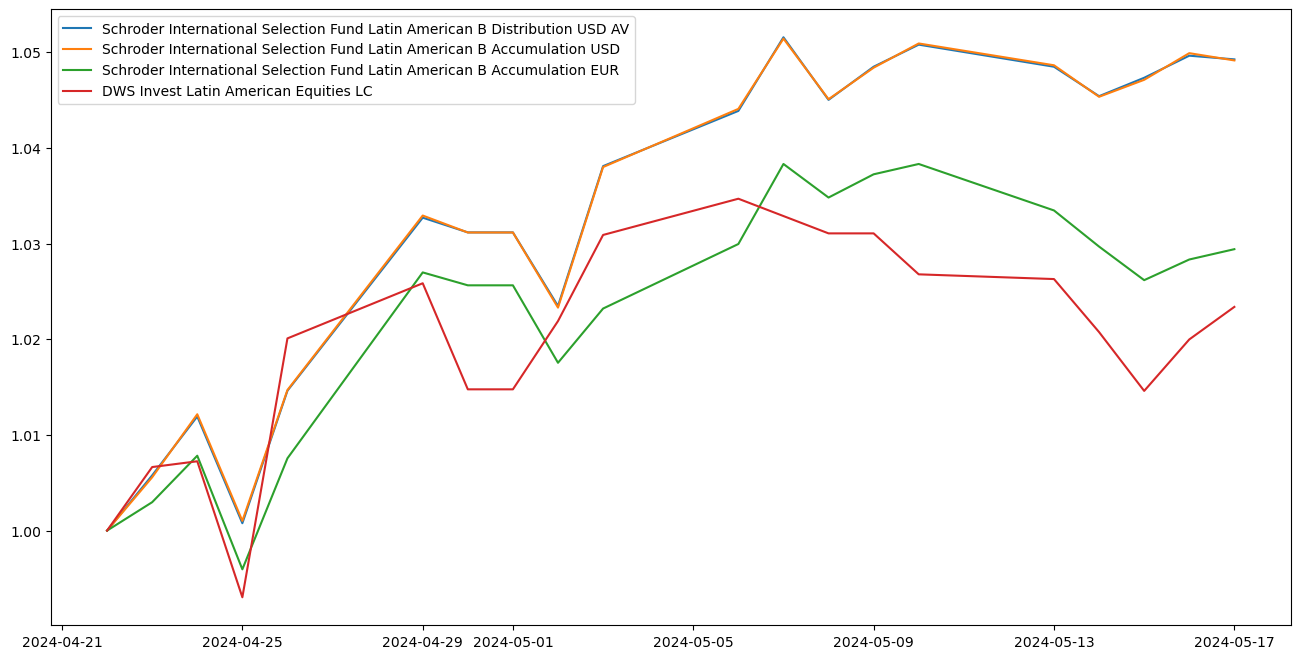

In [13]:
cats = ['Latin America Equity']
filter = df_perform['ft category'].isin(cats) & df_perform.index.isin(df_quotes.columns) & df_perform.index.isin(trendy_funds)
#filter &= df_perform.index.isin(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
df = df_quotes[df_perform[filter].index][-20:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()

In [14]:
df_trading_signal

,Trading Signal,Extreme Signal
Code,,
DE000A2DR2L2,0,-0.1
DE000A0X7541,0,-0.3
DE000A1T73W9,-1,0.2
LU1064047639,0,0.1
LU1997245177,-1,0.0
...,...,...
LU0338483158,0,1.0
LU0338482770,0,1.0
LU0090830497,0,1.0


In [15]:
df_quotes['LU1799936197']

2022-11-14    107.93
2022-11-15    108.07
2022-11-16    107.92
2022-11-17    107.68
2022-11-18    107.51
               ...  
2024-05-13    115.20
2024-05-14    115.28
2024-05-15    115.20
2024-05-16    115.18
2024-05-17    115.18
Name: LU1799936197, Length: 291, dtype: float64

In [16]:
df_quotes.index

Index([2022-11-14, 2022-11-15, 2022-11-16, 2022-11-17, 2022-11-18, 2022-11-21,
       2022-11-22, 2022-11-23, 2022-11-24, 2022-11-25,
       ...
       2024-05-06, 2024-05-07, 2024-05-08, 2024-05-09, 2024-05-10, 2024-05-13,
       2024-05-14, 2024-05-15, 2024-05-16, 2024-05-17],
      dtype='object', length=291)

In [17]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
import numpy as np
cvxpy.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

### Parameters

In [46]:
risk_free_rate = 0.03
last_n = 20
cov_n = 130

amount_to_buy = 65000
amount_to_sell = 130000

### Portofolio Studies

In [47]:


#Remove funds that were sold
ignore_funds = set()
#sold_funds = {'LU0115098948','LU0055114457','LU0300742037'}

#####  Get the current Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin((set(df_portofolio.index) & set(df_quotes.columns)) - ignore_funds)]


#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes[df_portofolio.index].iloc[-1]

#get the last USD change rate
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
usd2eur = exchange_rates.set_index('Date').iloc[0].iloc[0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio_x = df_portofolio.join(df_trading_signal)
df_portofolio_x['Total Signal'] = df_portofolio_x['Trading Signal'] + df_portofolio_x['Extreme Signal']
df_portofolio_x.sort_values('Total Signal')

current_portfolio_amount = df_portofolio['Amount EUR'].sum()

final_portfolio_amount = current_portfolio_amount + amount_to_buy - amount_to_sell
current_portfolio_amount,final_portfolio_amount

(346425.957754834, 281425.957754834)

In [48]:
df_portofolio.sort_values(by='Nome')

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
LU1124235240,Aberdeen Diversified Income,EUR,903.76000,9.56,8639.945600
LU1890834598,Allianz Global Water,EUR,81.00500,184.53,14947.852650
LU0823433858,BNP Paribas Funds Turkey,EUR,38.04900,286.17,10888.482330
IE00B432GG85,BNY Mell Glb Dyn Bond A,EUR,3609.77000,1.35,4873.189500
LU1508158513,BlackRock Asia Pacific,EUR,171.55000,139.91,24001.560500
LU2210151697,FF Abs Ret Gb Eq,USD,3301.37000,12.74,38659.788149
LU2207571022,FF Absolute Return Global Hedged,EUR,1886.04000,10.08,19011.283200
LU0594300096,Fidelity China Consumer,EUR,735.19000,18.71,13755.404900
LU0788144201,Fidelity China RMB Bond,EUR,242.77000,13.19,3202.136300


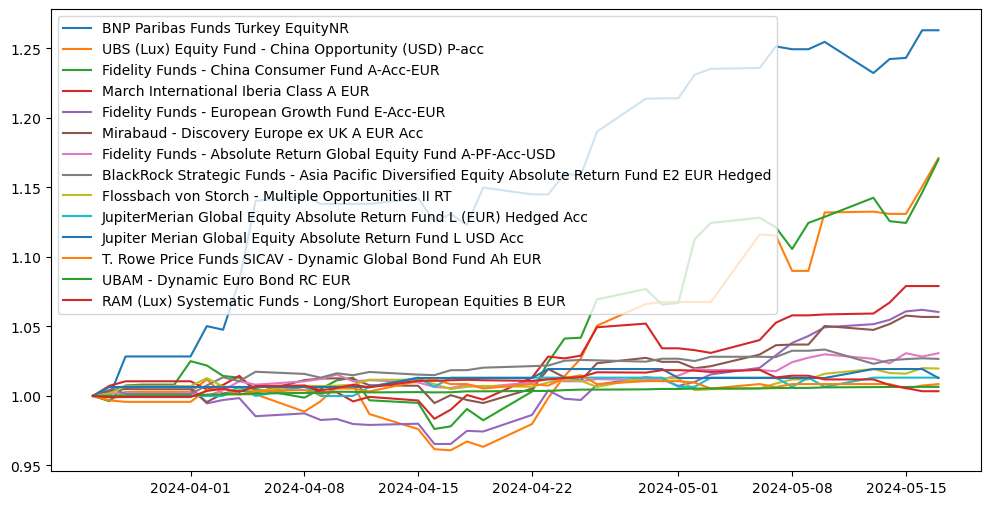

In [49]:
if len(df_portofolio_x[df_portofolio_x['Total Signal']<0].index):
    df_plot = df_quotes[df_portofolio_x[df_portofolio_x['Total Signal']<0].index][-40:]
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.plot()

### Portfolio Optimization Functions

In [50]:
def valid_date(d: date) -> date:
    if d in df_quotes.index:
        return d
    return max(dd for dd in df_quotes.index if dd <= d)
    
def new_fund_performance(new_portfolio, new_fund, amount=5000.0, risk_free_rate=risk_free_rate, last_n=last_n, goal='max_sharpe',target=None,weight_bounds = (0,1)):
    if new_fund in new_portfolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_perform.loc[new_fund]['currency'],1,amount,amount]

    mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[new_portfolio.index][-cov_n:]).ledoit_wolf()
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
    if goal=='max_sharpe':
        ef.max_sharpe(risk_free_rate=risk_free_rate)
    elif goal=='min_volatility':
        ef.min_volatility()
    elif goal=='efficient_risk':
        ef.efficient_risk(target_volatility=target)
    elif goal=='efficient_return':
        ef.efficient_return(target_return=target)
    else:
        raise ValueError('Invalid Goal!')
    return new_portfolio, ef.portfolio_performance(risk_free_rate=risk_free_rate)

def new_funds_to_add(df_portofolio, selected_funds, n_funds_to_add, last_n, goal, target=None, verbose=False, weight_bounds = (0,1)):

    mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()

    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
    ef.set_weights(weights)

    current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    max_sharpe = current_sharpe_ratio
    min_volatility = current_volatility
    amount = 10000.0
    funds_to_buy = []
    performance = None

    current_portfolio = df_portofolio.copy()
    for i in range(n_funds_to_add):
        best_fund = None
        for new_fund in selected_funds:
            try:
                _, (new_return,new_volatility,new_sharpe) = new_fund_performance(
                                                    new_portfolio=current_portfolio.copy(),
                                                    new_fund=new_fund,
                                                    last_n=last_n,
                                                    goal=goal,
                                                    target=target)
                if ((goal == 'max_sharpe') or (goal == 'efficient_risk')) and (new_sharpe > max_sharpe):
                    max_sharpe = new_sharpe
                    best_fund = new_fund
                if ((goal == 'min_volatility') or (goal == 'efficient_return')) and (new_volatility < min_volatility):
                    min_volatility = new_volatility
                    best_fund = new_fund
            except Exception as e:
                raise e
                pass
        
        if best_fund is None:
            print("\nNo more Funds found!")
            break
        else:
            funds_to_buy.append(best_fund)
            current_portfolio, performance = new_fund_performance(
                new_portfolio=current_portfolio,
                new_fund=best_fund,
                last_n=last_n,
                goal=goal,
                target=target)
            if verbose:
                print("### Performance with ", best_fund)
                print("Category: ",df_perform.loc[best_fund]['ft category'])
                print("Name: ",df_perform.loc[best_fund]['name'])
                print(performance)
    return funds_to_buy, performance

def portfolio_strategy(dfi, ef, prev_strategy=None):
    cleaned_weights = ef.clean_weights()
    cleaned_weights = [(s,w) for s,w in cleaned_weights.items()]
    dfo = pd.DataFrame(cleaned_weights,columns=['Code','w']).sort_values(by='w',ascending=False)
    df = pd.merge(dfi,dfo,on=['Code'],how='outer',suffixes=('_i','_o')).fillna(0)
    if prev_strategy is not None:
        df['strategy'] =  df.apply(lambda x: prev_strategy.loc[x['Code']]['strategy'], axis=1)
    else:
        df['strategy'] = 'c'
    df['final_amount'] = df.apply(lambda x: x['amount'] if x['strategy']=='k' else x['w_o']*final_portfolio_amount, axis=1)
    df['change_amount'] = df['final_amount'] - df['amount']

    return df

def strategy(x):
    if x['w_o'] == 0.0:
        return 'sa'
    if x['w_o'] < x['w_i']:
        return 'kp'
    return "i"

### Initialize Parameters

In [51]:

current_date = df_quotes.index.max()

last_n_days = 21
cov_n_days = 153

new_portfolio = df_portofolio

n_funds_to_add = 7
max_weight = 0.09

# Select relevant funds
df_perform['2w'] = df_quotes.loc[current_date]/df_quotes.loc[valid_date(current_date - timedelta(days=14))]
selected_funds = set(df_perform[df_perform.groupby('ft category')['2w'].transform('max')==df_perform['2w']].index)
selected_funds |= set(df_perform[df_perform['rating'] >= 5].index)
selected_funds -= set(df_portofolio.index)
selected_funds &= relevant_funds

print(f"Number of Selected Funds = {len(selected_funds)}")

Number of Selected Funds = 318


In [52]:
#####  Portofolio current weigths and performance

print("### Period = {} - {}".format(valid_date(current_date - timedelta(days=last_n_days)),current_date))
# mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
# S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()
mu = mean_historical_return(df_quotes[df_portofolio.index].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[df_portofolio.index].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)
dfi = pd.DataFrame({'w':weights,'name':df_portofolio['Nome'], 'amount':df_portofolio["Amount EUR"]}).reset_index().sort_values(by='w',ascending=False)
#print(dfi)
print("### Curent Performance")
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)


### Period = 2024-04-26 - 2024-05-17
### Curent Performance
Expected annual return: 49.8%
Annual volatility: 2.0%
Sharpe Ratio: 22.93


(0.4982556335700672, 0.020424200137640944, 22.92651023856213)

### Create the initial Strategy

### Performance with  LU0069152568
ft category                    Sector Equity Biotechnology
name           UBS (Lux) Equity Fund - Biotech (USD) P-acc
Name: LU0069152568, dtype: object
(1.9742073678172314, 0.036654256360788603, 53.04178998150605)
### Performance with  LU0115765678
ft category                              Spain Equity
name           Fidelity Funds - Iberia Fund E-Acc-EUR
Name: LU0115765678, dtype: object
(2.02663682371184, 0.037004023503700564, 53.957289901520234)
### Performance with  LU0348723411
ft category                             Sector Equity Technology
name           Allianz Global Investors Fund - Allianz Global...
Name: LU0348723411, dtype: object
(2.1522392648875277, 0.03867868713326177, 54.868441050640165)
### Performance with  LU0209156925
ft category                           Property - Indirect Europe
name           Janus Henderson Horizon Pan European Property ...
Name: LU0209156925, dtype: object
(2.062960767755989, 0.03672024887785555, 55.363480092

,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
2,LU0132636399,0.066253,UBAM Dynamic Euro Bond,22951.697400,0.00879,c,2473.734169,-20477.963231
0,LU2210151697,0.111596,FF Abs Ret Gb Eq,38659.788149,0.06832,c,19227.021434,-19432.766716
3,LU2207571022,0.054878,FF Absolute Return Global Hedged,19011.283200,0.00000,c,0.000000,-19011.283200
4,LU2047632166,0.054510,T.Rowe SICAV Dynamic Credit,18883.675553,0.00000,c,0.000000,-18883.675553
1,LU1508158513,0.069283,BlackRock Asia Pacific,24001.560500,0.02325,c,6543.153518,-17458.406982
5,LU1799936197,0.049546,Pictet TR - Sirius,17164.081740,0.00000,c,0.000000,-17164.081740
9,LU0115764192,0.042539,Fidelity European Growth,14736.518000,0.00000,c,0.000000,-14736.518000
10,LU1308313201,0.042294,Mirabaud - Discovery Europe ex UK,14651.708080,0.00000,c,0.000000,-14651.708080
12,LU0594300096,0.039707,Fidelity China Consumer,13755.404900,0.00000,c,0.000000,-13755.404900
11,LU0252500524,0.040616,JPM EUR Money VNAV,14070.533820,0.00288,c,810.506758,-13260.027062


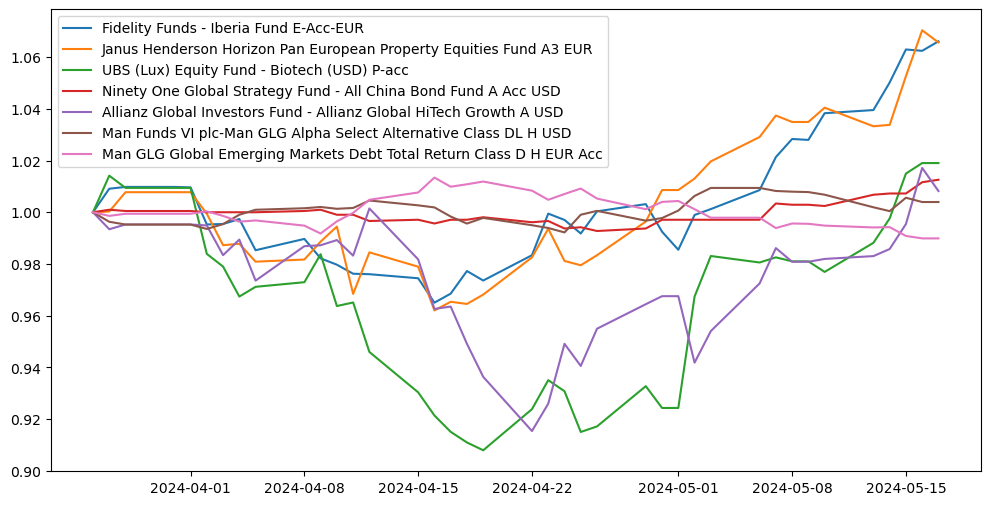

In [54]:
# target_return = 0.6

#ignore_funds = ['LU1133289758']
#selected_funds = [x for x in selected_funds if x not in ignore_funds]
#####  Get the funds for the target volatility
funds_to_buy, performance = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=n_funds_to_add,
    last_n=last_n,
    #goal='efficient_return',
    #goal='min_volatility',
    goal='max_sharpe',
    #target=target_return,
    verbose=True,
    weight_bounds=(0,max_weight))

new_p = new_portfolio.index.append(pd.Index(funds_to_buy))

mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=(0,max_weight), solver='SCS')
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df_plot = df_quotes[pd.Index(funds_to_buy)][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()
df.sort_values('change_amount')

### Get the revised Strategy, create wight bounds and initialize portofolio amounts

In [59]:
weight_strategy = pd.read_csv('portfolio_changes_strategy.csv',index_col=0)

transaction_limit = 3000.0
weight_bounds = list()
buy_list = list()
#df2 = df.set_index('Code')
for i, code in enumerate(df_quotes[new_p].columns):
    #print(i,code,weight_strategy.loc[code]['strategy'])
    if weight_strategy.loc[code]['strategy'] == 'c':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        #print(i, code, weight_strategy.loc[code]['change_amount'], weight_strategy.loc[code]['w_i'], weight_strategy.loc[code]['w_o'], kw)
        if abs(weight_strategy.loc[code]['change_amount']) < transaction_limit:
            weight_bounds.append((kw,kw)) # Keep
        elif weight_strategy.loc[code]['change_amount'] >= 0.0:
            weight_bounds.append((kw,max_weight)) # keep or buy
        else:
            weight_bounds.append((0.0,kw)) #keep or sell
    elif weight_strategy.loc[code]['strategy'] == 'k':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        weight_bounds.append((kw,kw))
    elif weight_strategy.loc[code]['strategy'] == 'f':
        kw = weight_strategy.loc[code]['final_amount'] / final_portfolio_amount # weight for a fixed amount
        weight_bounds.append((kw,kw))
    else:
        print("Unknown weight_strategy:",weight_strategy.loc[code])
    if weight_strategy.loc[code]['change_amount'] >= 0.0:
        buy_list.append((i,weight_strategy.loc[code]['w_i']))

#buy_list

### Optimize the Target Return for the revised Strategy

In [60]:
#target_return = 0.8
mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
# Limit the amount to buy
buy_final_w = (sum([w_i for _,w_i in buy_list])*current_portfolio_amount + amount_to_buy) / final_portfolio_amount
ef.add_constraint(lambda x : sum([x[i] for i,_ in buy_list]) == buy_final_w)
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef,prev_strategy=weight_strategy)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df.sort_values('change_amount')


Expected annual return: 103.1%
Annual volatility: 2.8%
Sharpe Ratio: 35.89


,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
4,LU2047632166,0.054510,T.Rowe SICAV Dynamic Credit,18883.675553,0.00000,c,0.000000,-18883.675553
7,IE00BD3B6K23,0.047888,Man GLG Emerging Markets Debt,16589.476592,0.00000,f,0.000000,-16589.476592
9,LU0115764192,0.042539,Fidelity European Growth,14736.518000,0.00000,c,0.000000,-14736.518000
10,LU1308313201,0.042294,Mirabaud - Discovery Europe ex UK,14651.708080,0.00000,c,0.000000,-14651.708080
15,IE00BLP5S353,0.033501,Jupiter Glb Abs Rt USD,11605.502161,0.00000,c,0.000000,-11605.502161
8,LU1890834598,0.043149,Allianz Global Water,14947.852650,0.01457,c,4100.376204,-10847.476446
5,LU1799936197,0.049546,Pictet TR - Sirius,17164.081740,0.02425,c,6824.579476,-10339.502265
0,LU2210151697,0.111596,FF Abs Ret Gb Eq,38659.788149,0.10529,c,29631.339092,-9028.449057
16,LU0823433858,0.031431,BNP Paribas Funds Turkey,10888.482330,0.01753,c,4933.397039,-5955.085291
3,LU2207571022,0.054878,FF Absolute Return Global Hedged,19011.283200,0.04681,c,13173.549083,-5837.734117


### Best Portofolio from all the funds

In [ ]:
'''### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)

mu = mean_historical_return(df_top[-13:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_top[-13:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df['name'] = df['symbol'].map(df_perform['name'])
best_from_all = df['symbol']
print(df)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
'''

"### Inputs\n# Funds to use\nselected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()\ndf_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)\n\nmu = mean_historical_return(df_selected_quotes[-last_n:])\n# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)\n# mu_ds = df_perform['2 week']\n# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()\nS = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()\nef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))\nef.max_sharpe(risk_free_rate=risk_free_rate)\n#ef.efficient_return(target_return=0.25)\ncleaned_weights = ef.clean_weights()\ncleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]\ndf = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)\n\ndf_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)\n\nmu = mean_historical_return(df_top[-13:])\n# mu_ds = ((df_perform[

### Study Best Return

In [ ]:
'''
#min_return, max_return = 0.13, 0.30

result = list()
for tr in np.linspace(min_return, max_return, 13)[1:-2]:
    _, performance = new_funds_to_add(
        df_portofolio=new_portfolio,
        selected_funds=selected_funds, 
        n_funds_to_add=n_funds_to_add,
        last_n=last_n,
        goal='efficient_return',
        target=tr,
        verbose=False,
        weight_bounds=(0,max_weight))
    if performance is not None:
        result.append(performance)
        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()'''

'\n#min_return, max_return = 0.13, 0.30\n\nresult = list()\nfor tr in np.linspace(min_return, max_return, 13)[1:-2]:\n    _, performance = new_funds_to_add(\n        df_portofolio=new_portfolio,\n        selected_funds=selected_funds, \n        n_funds_to_add=n_funds_to_add,\n        last_n=last_n,\n        goal=\'efficient_return\',\n        target=tr,\n        verbose=False,\n        weight_bounds=(0,max_weight))\n    if performance is not None:\n        result.append(performance)\n        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")\ndf_result = pd.DataFrame(result,columns=[\'return\',\'volatility\',\'sharpe\']).set_index(\'volatility\')\n\n# Create a figure and axis\nfig, ax1 = plt.subplots()\n\n# Plot the first variable on the left y-axis\ncolor = \'tab:green\'\nax1.set_xlabel(\'X-axis\')\nax1.set_ylabel(\'Return\', color=color)\nax1.plot(df_result.index, df_result[\'return\'], color=color)\nax1.tick_params(axis=\'y\', labelcolor=color)\n